In [76]:
import os
import glob
import numpy as np
import pandas as pd
from obspy import UTCDateTime, read, Stream
import matplotlib.pyplot as plt

project_dir = f'{os.getcwd()}/..'
ppick_dir = f'{project_dir}/results/phasenet_diting_others/phasenet_files'
waveform_dir = f'{project_dir}/data/eq_data/2_waveforms'

ppick_file = f'{ppick_dir}/diting_phasenet_3d_grid_processed_fullWF.csv' 
allpick_file = f'{ppick_dir}/ALL_PICKS_POL_new2.csv'

# %reload_ext autoreload
# %autoreload 2

## Read the `mseed` list and `polarity pick` files into dataframe 
##

In [77]:
# mseed_list = os.listdir(waveform_dir)
mseed_list = pd.read_csv(f'{ppick_dir}/../mseed_list_47.csv').fname.to_list()

# selected event
sel_ev = mseed_list[5] #2

# read the ppick file (includes phasenet, diting, pyrocko picks)
pol_df = pd.read_csv(allpick_file, parse_dates=['phase_time', 'pyrocko_phase_time'])
# pol_df = pol_df[pol_df.phase_score > 0.8]

In [78]:
from classes_functions.my_class_funcs import WaveformPlotter
%reload_ext autoreload
%autoreload 2

wfp = WaveformPlotter()

## Plot each station waveform into one subplot
using `plotWFpick_subplots` function in `WaveformPlotter` class

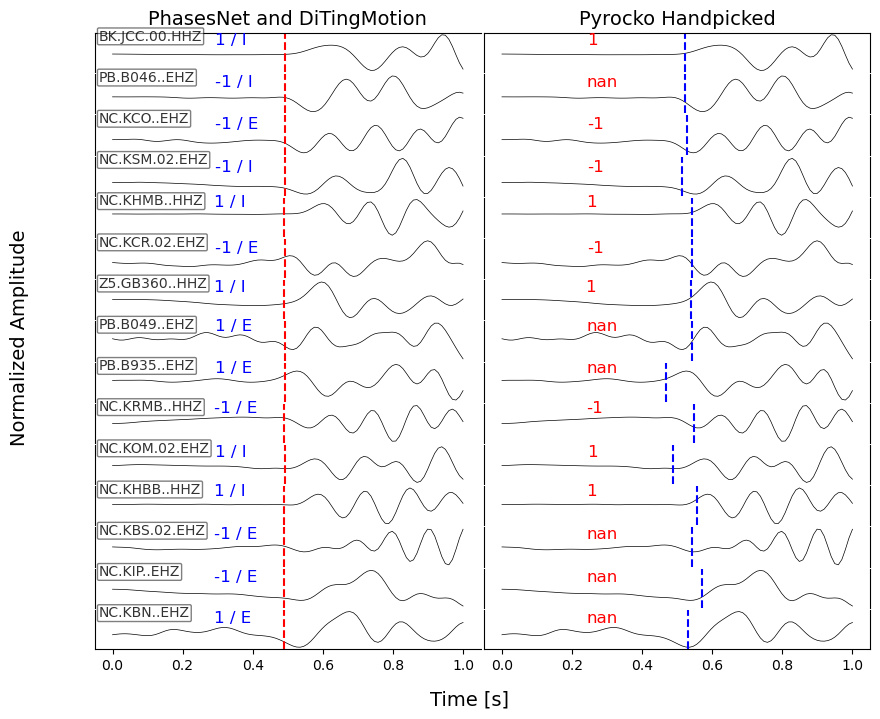

In [79]:
fig, axs = wfp.plotWFpick_subplots(
    sel_ev, pol_df, waveform_dir, 
    figsize=(10, 8),
    n_subplots=15, 
    slice_len=0.5,
    normalize=True,
    hide_spines=True,
    hor_line=False,
    )

# Reduce the spacing between subplots
plt.subplots_adjust(hspace=0.05, wspace=0.01)

# plt.tight_layout()
plt.show()  

# One subplot for all stations

### Using class function:

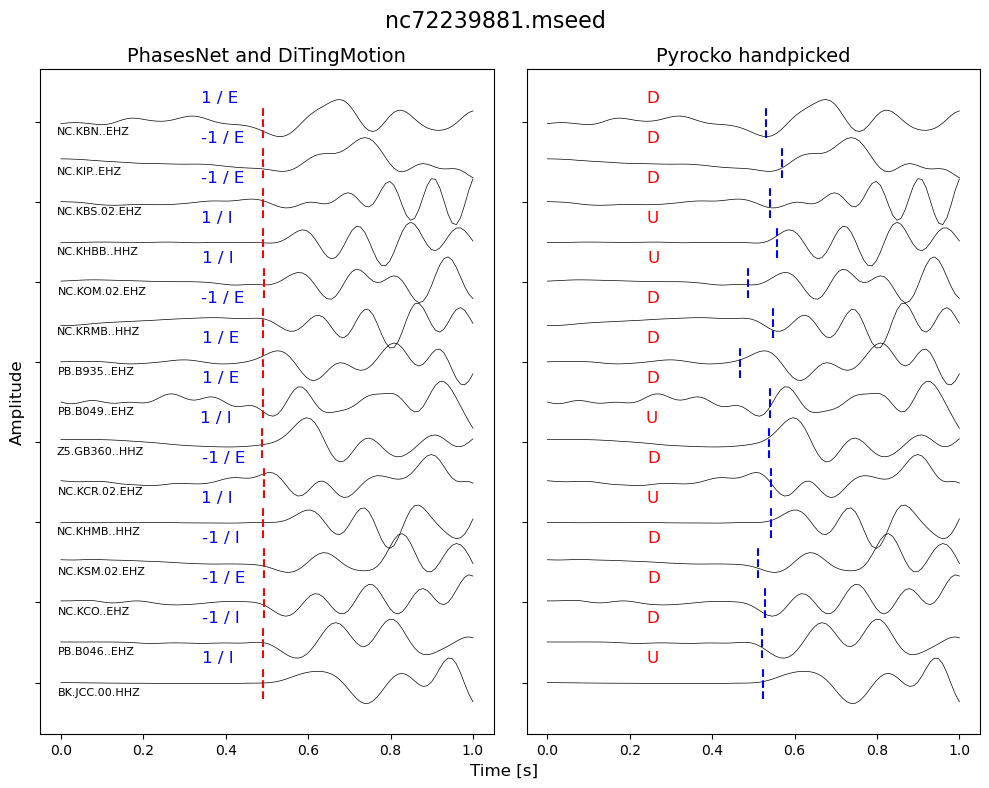

In [83]:
fig, [ax1, ax2] = wfp.plotWFpick_oneplot(
    mseed_file = sel_ev,
    pol_df = pol_df,
    waveform_dir = waveform_dir,
    figsize=(10, 8),
    n_subplots=15, 
    slice_len=0.5,
    zoom=2,
    normalize = True,
    hor_line = False,
)
ax1.set_title('PhasesNet and DiTingMotion', fontsize=14)
ax2.set_title('Pyrocko handpicked', fontsize=14)

# hide y axis labels
for ax in [ax1, ax2]: ax.set_yticklabels([])

plt.suptitle(f'{sel_ev}', fontsize=16)
plt.tight_layout()
plt.show()

# IDEA: ADD A COLUMN IN THE ALL PICKS FILE 'EVENT-STA-DIST', THIS WILL MAKE IT EASIER TO SORT WHEN PLOTTING

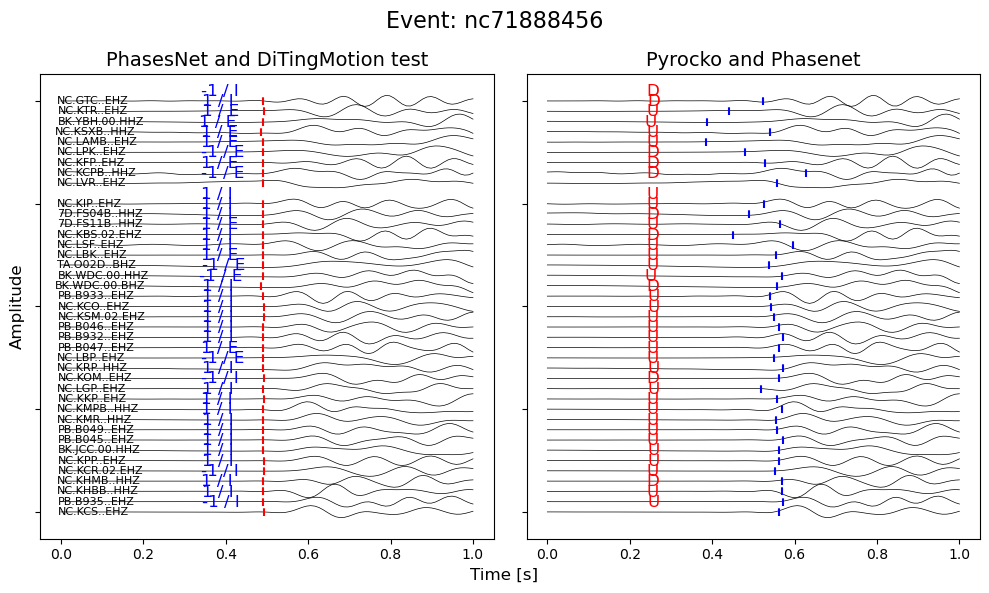

In [81]:
from classes_functions.my_class_funcs import WaveformPlotter
%reload_ext autoreload
%autoreload 2

wfp = WaveformPlotter()

fig, [ax1, ax2] = wfp.plotWFpick_oneplot(
    mseed_file = 'nc71888456.mseed',
    pol_df = pol_df,
    waveform_dir = waveform_dir,
    n_subplots='all', 
    slice_len=0.5,
    zoom=2,
    normalize = True,
    hor_line = False,
)
ax1.set_title('PhasesNet and DiTingMotion test', fontsize=14)

# hide y axis labels
for ax in [ax1, ax2]: ax.set_yticklabels([])

plt.suptitle('Event: nc71888456', fontsize=16)
plt.tight_layout()
plt.show()